In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [5]:
data = pd.read_csv("C:/Users/jesus/Desktop/curso IA/customer_data.csv")
data

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica
...,...,...,...,...,...
195,196,69,77,99,Libros
196,197,30,86,36,Electrónica
197,198,58,65,82,Electrónica
198,199,20,43,96,Alimentos


In [6]:
escalator = MinMaxScaler()
data_escalada = escalator.fit_transform( data[ [ 'Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)' ] ] )
data_escalada

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

In [13]:
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform( data_escalada )
pca_resultados

array([[ 0.18987698,  0.25216788],
       [ 0.52135074,  0.25104882],
       [-0.33364803,  0.15019777],
       [-0.26362112, -0.34345506],
       [ 0.02316355,  0.41358229],
       [-0.50219204, -0.05706621],
       [ 0.57247829, -0.23046418],
       [-0.14290518,  0.38543247],
       [-0.19522531, -0.03806374],
       [-0.4763978 ,  0.12518629],
       [ 0.08675895, -0.16367159],
       [-0.02929578, -0.22487331],
       [-0.21990832, -0.01041273],
       [ 0.66150162, -0.00598256],
       [ 0.29627208,  0.32618273],
       [-0.15508356,  0.09485373],
       [ 0.27832454, -0.63017097],
       [ 0.03273294, -0.05960065],
       [-0.2747371 , -0.25558199],
       [-0.46403797,  0.03854741],
       [-0.23162565,  0.46816441],
       [-0.27665354, -0.07949897],
       [-0.56746665,  0.34354712],
       [-0.04020254, -0.42510871],
       [ 0.10821725,  0.04004383],
       [ 0.06474278,  0.14759479],
       [-0.62546229, -0.15040202],
       [-0.28581655, -0.23647355],
       [ 0.12875028,

In [8]:
U, sigma, VT = np.linalg.svd(data_escalada)


In [9]:
K = 2
svd_resultados = U[:, :K] * sigma[:K]

In [10]:
kmeans = KMeans( n_clusters=3, random_state=42 )
kmeans_cluster = kmeans.fit_predict(data_escalada)

In [11]:
linked = linkage( data_escalada,  'ward')

In [12]:
pca_resultados[:,0]

array([ 0.18987698,  0.52135074, -0.33364803, -0.26362112,  0.02316355,
       -0.50219204,  0.57247829, -0.14290518, -0.19522531, -0.4763978 ,
        0.08675895, -0.02929578, -0.21990832,  0.66150162,  0.29627208,
       -0.15508356,  0.27832454,  0.03273294, -0.2747371 , -0.46403797,
       -0.23162565, -0.27665354, -0.56746665, -0.04020254,  0.10821725,
        0.06474278, -0.62546229, -0.28581655,  0.12875028, -0.19916596,
        0.15589298,  0.50630849,  0.66136913, -0.58252121, -0.01793928,
       -0.11052696,  0.22686745, -0.03690209,  0.61983886,  0.07791768,
        0.25430522, -0.07614304,  0.09595984, -0.01546388,  0.23669635,
        0.02785021, -0.36261133, -0.08470142, -0.26042089,  0.36015134,
        0.28129436,  0.2785206 ,  0.12188548, -0.1665739 , -0.60530678,
        0.33679572,  0.2387118 ,  0.46980561, -0.22459608,  0.32807477,
        0.28383089, -0.53394468, -0.06641887, -0.28280995,  0.13868585,
        0.09782256,  0.39457533,  0.50580846, -0.31665049, -0.41

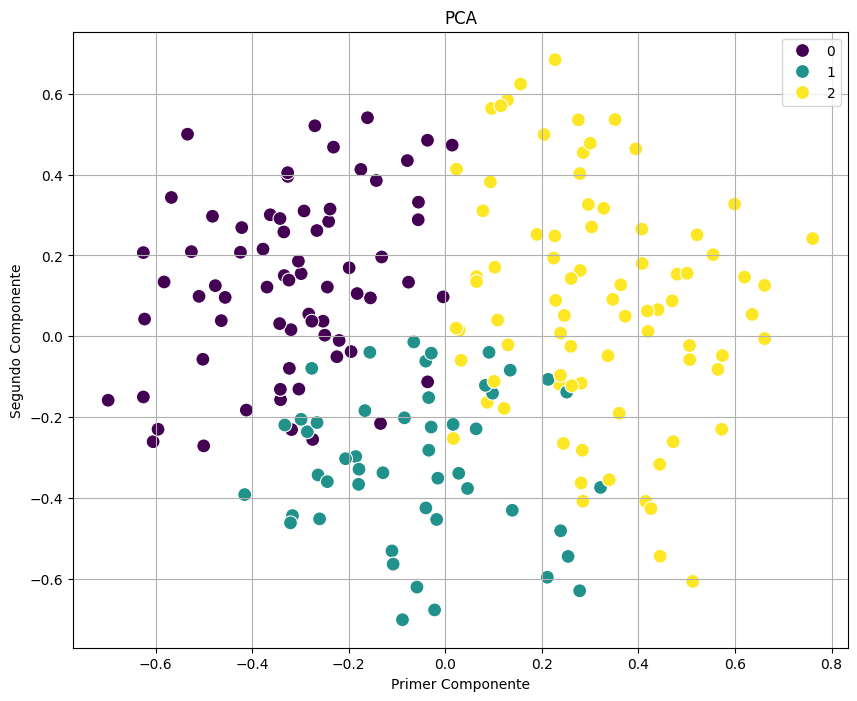

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot( x=pca_resultados[:,0], y=pca_resultados[:,1], hue=kmeans_cluster, palette='viridis', s=100)
plt.grid(True)
plt.legend()
plt.xlabel('Primer Componente')
plt.ylabel('Segundo Componente')
plt.title('PCA');


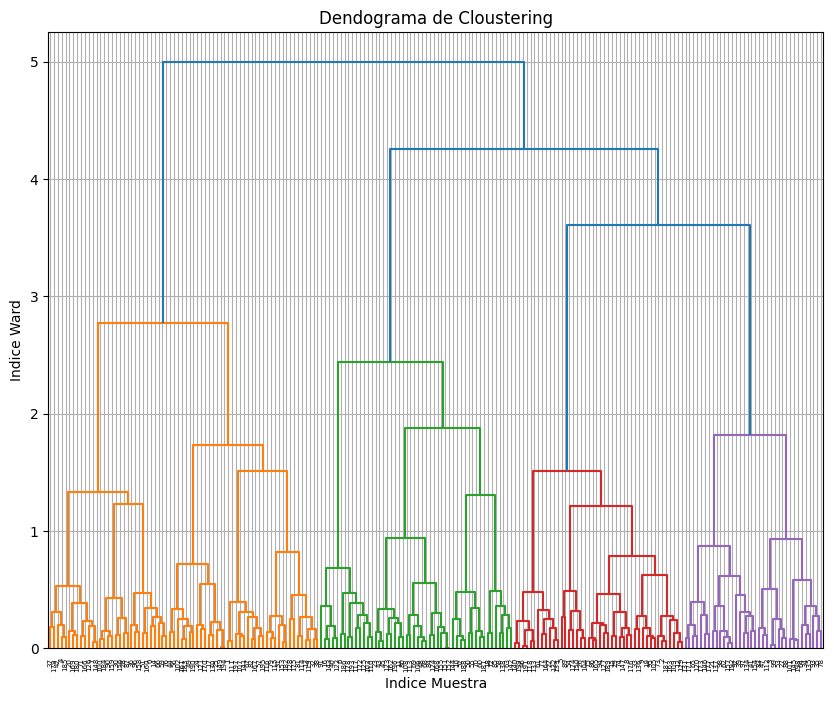

In [16]:

plt.figure(figsize=(10,8))
dendrogram( linked )
plt.grid(True)
plt.xlabel('Indice Muestra')
plt.ylabel('Indice Ward')
plt.title('Dendograma de Cloustering')
plt.axhline(y=10, color='r', linestyle='--');

In [19]:
cluster_info = pd.DataFrame( { 'cluster': kmeans_cluster, 'Edad': data['Edad'], 'Ingresos': data['Ingresos Anuales (k$)'], 'Gasto': data['Puntuación de Gasto (1-100)'] } )

In [20]:
cluster_info

,cluster,Edad,Ingresos,Gasto
0,2,56,89,47
1,2,69,91,86
2,0,46,46,23
3,1,32,28,66
4,2,60,81,27
...,...,...,...,...
195,2,69,77,99
196,0,30,86,36
197,2,58,65,82
198,1,20,43,96
